In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import scipy.stats as st
import seaborn as sns

In [9]:
# File to Load
df = Path("park_data_clean.csv")

# Read Data File and store into Pandas DataFrames
df = pd.read_csv(df)

df.head()

,national_park,date_established,visitors,description,state,latitude,longitude,acres,year_established,us_location
0,Acadia,1919-02-26,4069098,Covering most of Mount Desert Island and other...,Maine,44.350000,-68.216667,49071.40,1919,East
1,American Samoa,1988-10-31,8495,The southernmost national park is on three Sam...,American Samoa,-14.250000,-170.683333,8256.67,1988,West
2,Arches,1971-11-12,1806865,"This site features more than 2,000 natural san...",Utah,38.683333,-109.566667,76678.98,1971,West
3,Badlands,1978-11-10,1224226,"The Badlands are a collection of buttes, pinna...",South Dakota,43.750000,-102.500000,242755.94,1978,West
4,Big Bend,1944-06-12,581220,Named for the prominent bend in the Rio Grande...,Texas,29.250000,-103.250000,801163.21,1944,West


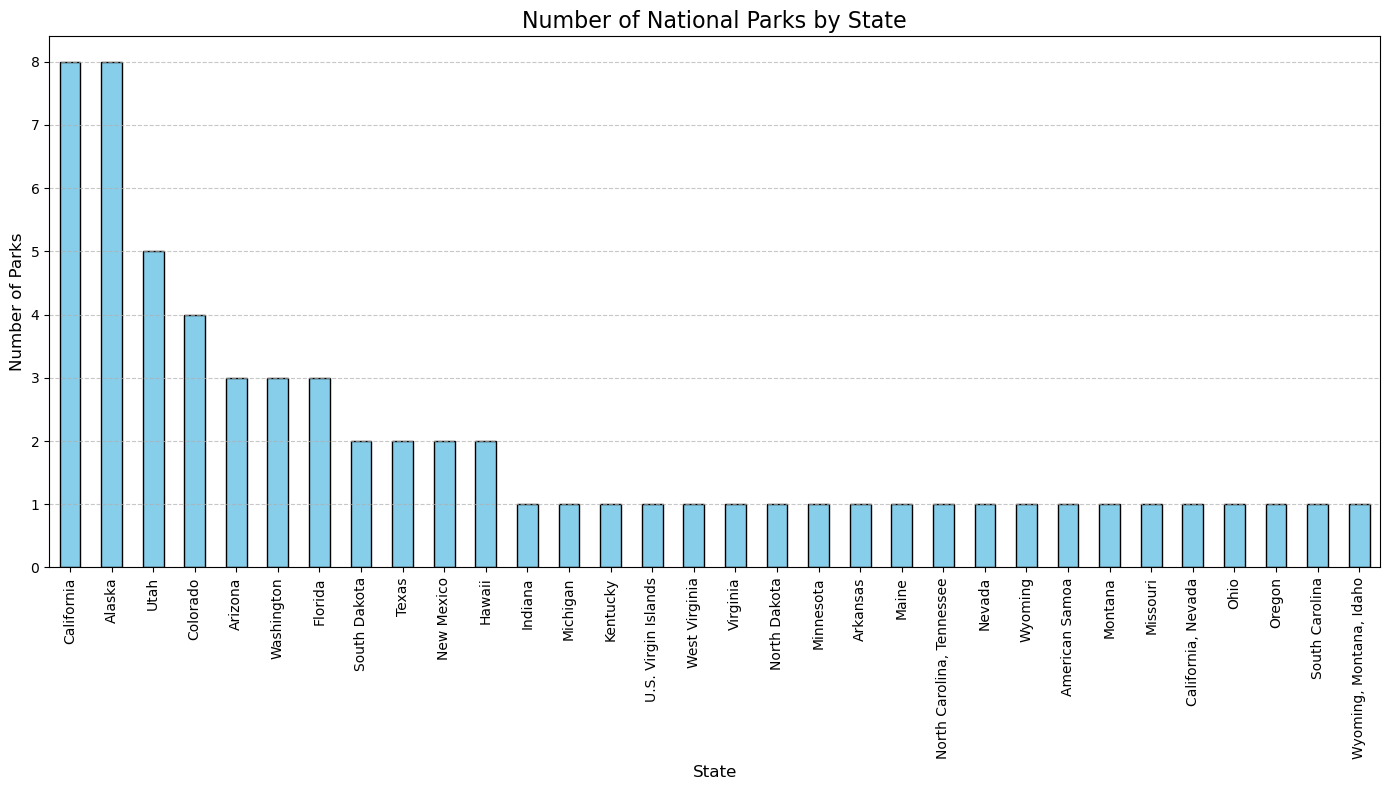

state
California    8
Alaska        8
Utah          5
Colorado      4
Arizona       3
Name: count, dtype: int64

In [15]:
# Count the number of parks per state
state_distribution = df['state'].value_counts()

# Plot the distribution of parks across states
plt.figure(figsize=(14, 8))
state_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of National Parks by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Parks', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Identify states with the highest density of parks
top_states = state_distribution.head(5)
top_states

In [25]:
# Violin plot for visitor counts by region
plt.figure(figsize=(12, 6))
sns.violinplot(x='us_location', y='visitors', df=df, palette='muted', scale='width')
plt.title('Distribution of Visitor Counts by U.S. Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Visitor Count', fontsize=12)
plt.yscale('log')  # Log scale to handle wide range of visitor counts
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Prepare data for a heatmap (correlation between latitude, longitude, and visitors)
heatmap_data = data[['latitude', 'longitude', 'visitors']].corr()

# Generate the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Visitor Counts and Location', fontsize=16)
plt.tight_layout()
plt.show()

ValueError: Could not interpret value `us_location` for `x`. Value is a string, but `data` was not passed.

<Figure size 1200x600 with 0 Axes>

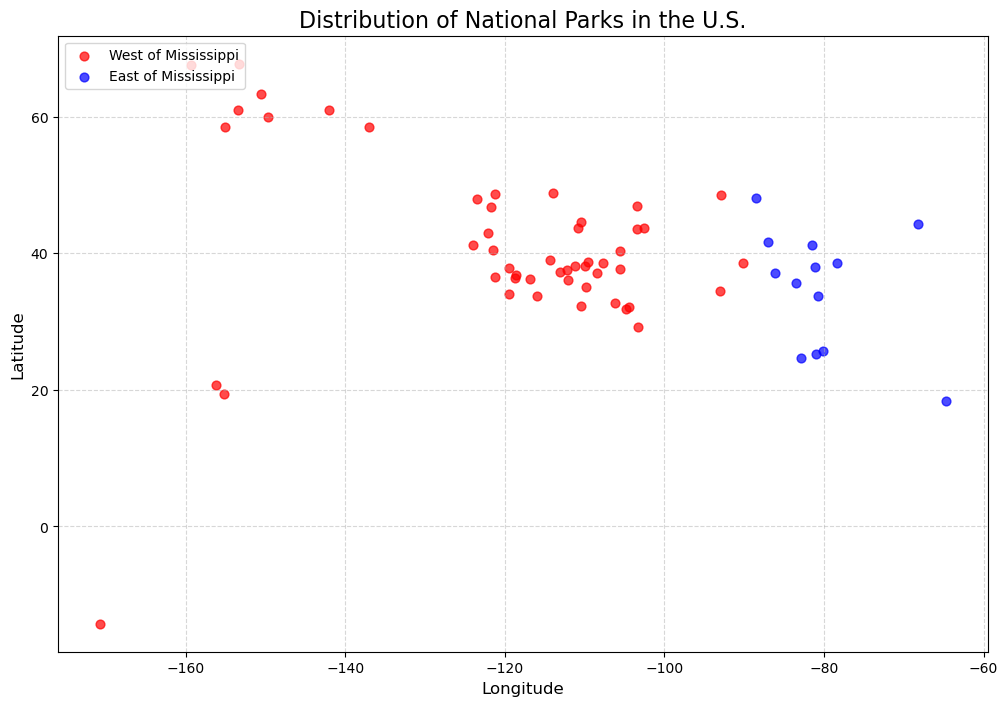

In [37]:
# Create a scatter plot for parks
plt.figure(figsize=(12, 8))

# Parks west of the Mississippi
west = df[df['longitude'] <= -90]
plt.scatter(west['longitude'], west['latitude'], c='red', s=40, label='West of Mississippi', alpha=0.7)

# Parks east of the Mississippi
east = df[df['longitude'] > -90]
plt.scatter(east['longitude'], east['latitude'], c='blue', s=40, label='East of Mississippi', alpha=0.7)

# Add title, labels, and legend
plt.title('Distribution of National Parks in the U.S.', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid(linestyle='--', alpha=0.5)

# Show the map
plt.show()

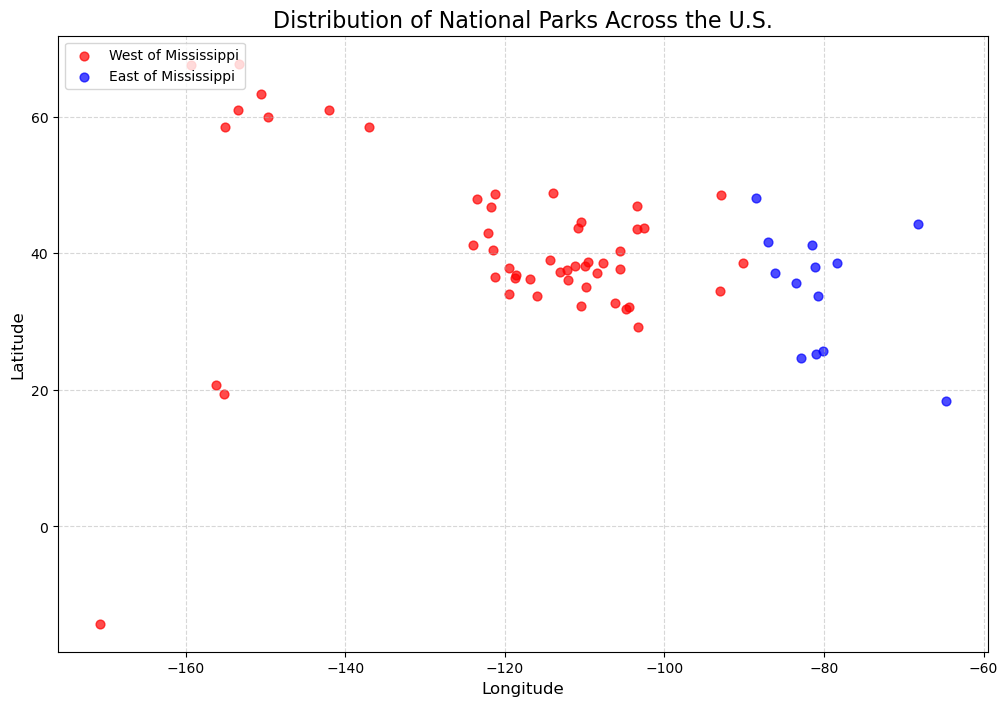

In [39]:
# Filter parks east and west of the Mississippi
west = df[df['longitude'] <= -90]
east = df[df['longitude'] > -90]

# Create a scatter plot for parks
plt.figure(figsize=(12, 8))

# Plot parks west of the Mississippi
plt.scatter(west['longitude'], west['latitude'], c='red', s=40, label='West of Mississippi', alpha=0.7)

# Plot parks east of the Mississippi
plt.scatter(east['longitude'], east['latitude'], c='blue', s=40, label='East of Mississippi', alpha=0.7)

# Add labels, legend, and title
plt.title('Distribution of National Parks Across the U.S.', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid(linestyle='--', alpha=0.5)

# Show the map
plt.show()

In [63]:
# Import hvplot
import hvplot.pandas
import geoviews.pandas

# Configure the map plot_4
map_plot_4 = df.hvplot.points(
    "longitude",
    "latitude",
    geo = True,
    tiles = "EsriNatGeo",
    frame_width = 700,
    frame_height = 500,
    size = "Population",
    scale = 0.01,
    color = "City"
)
# Display the map plot
map_plot_4

ModuleNotFoundError: No module named 'geoviews'

In [63]:
# Import hvplot
import hvplot.pandas
import geoviews.pandas

# Configure the map plot_4
map_plot_4 = df.hvplot.points(
    "longitude",
    "latitude",
    geo = True,
    tiles = "EsriNatGeo",
    frame_width = 700,
    frame_height = 500,
    size = "Population",
    scale = 0.01,
    color = "City"
)
# Display the map plot
map_plot_4

ModuleNotFoundError: No module named 'geoviews'

In [71]:
# Import hvplot
import hvplot.pandas

# Configure the map plot_4
map_plot_4 = df.hvplot.points(
    "longitude",
    "latitude",
    geo = True,
    tiles = "EsriNatGeo",
    frame_width = 700,
    frame_height = 500,
    size = "Population",
    scale = 0.01,
    #color = "State"
)
# Display the map plot
map_plot_4

ImportError: Geographic projection support requires: cartopy, geoviews, pyproj.

In [73]:
# Enhanced map visualization with state boundaries and annotations

# Load a shapefile for state boundaries
from mpl_toolkits.basemap import Basemap

plt.figure(figsize=(14, 10))
m = Basemap(
    projection='merc',
    llcrnrlat=24, urcrnrlat=50,  # Latitude bounds
    llcrnrlon=-125, urcrnrlon=-66,  # Longitude bounds
    resolution='i'  # Intermediate resolution
)

# Draw state boundaries and coastlines
m.drawstates(linewidth=0.5, color='black')
m.drawcoastlines(linewidth=0.5)
m.drawcountries(linewidth=1)

# Scatter plot for parks east and west of the Mississippi
east_of_mississippi = data[data['longitude'] > -90]
west_of_mississippi = data[data['longitude'] <= -90]

# Plot east of Mississippi
x_east, y_east = m(east_of_mississippi['longitude'].values, east_of_mississippi['latitude'].values)
m.scatter(x_east, y_east, c='blue', s=40, alpha=0.7, label='East of Mississippi', edgecolor='black')

# Plot west of Mississippi
x_west, y_west = m(west_of_mississippi['longitude'].values, west_of_mississippi['latitude'].values)
m.scatter(x_west, y_west, c='red', s=40, alpha=0.7, label='West of Mississippi', edgecolor='black')

# Add annotations for top parks by visitor count
for _, row in data.nlargest(5, 'visitors').iterrows():
    x, y = m(row['longitude'], row['latitude'])
    plt.text(x, y, row['national_park'], fontsize=9, ha='left', va='bottom', color='darkgreen')

# Title, legend, and labels
plt.title('Enhanced Distribution of National Parks Across the U.S.', fontsize=16)
plt.legend(loc='lower left', fontsize=10)
plt.tight_layout()

plt.show()

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [79]:
#Prepare data for a heatmap (correlation between latitude, longitude, and visitors)
heatmap_data = data[['latitude', 'longitude', 'visitors']].corr()

NameError: name 'data' is not defined